In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [6]:
df = pd.read_csv("data.csv")
df.head(1)

,id_venta,id_cliente,nombre,edad,procedencia,fecha,hora,categoria,duracion_min,precio,metodo_pago
0,20917b10-7ac0-4a89-9b05-cbb695372a1b,14812,Bridget Ramsey,20,Jonesmouth,2024-05-17,13:23,pequeño,72,94,efectivo


In [7]:
# Preparar datos sobre clientes
df["fecha"] = pd.to_datetime(df["fecha"])

clientes = df.groupby("id_cliente").agg(
    {
        "fecha": lambda x: (df["fecha"].max() - x.max()).days,
        "id_cliente": "count",
        "precio": "mean"
    }
    
).rename(columns={
    "fecha": "dias_ultima_compra",
    "id_cliente": "frecuencia",
    "precio": "gasto_promedio"
})

clientes.head()


,dias_ultima_compra,frecuencia,gasto_promedio
id_cliente,,,
0,128,2,493.0
1,204,2,330.5
2,75,2,120.0
4,17,2,65.0
6,49,2,267.0


In [15]:
# Normalizar datos

scaler = sklearn.preprocessing.StandardScaler()
clientes_scaled = scaler.fit_transform(clientes)

<function matplotlib.pyplot.show(close=None, block=None)>

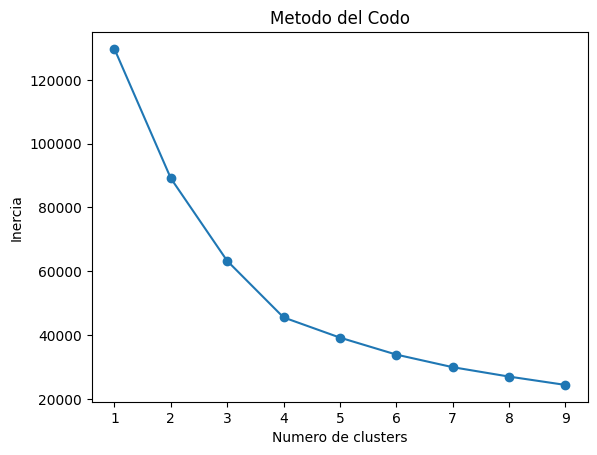

In [18]:
# Aplicar K-Means

inertia = []
K_range = range(1,10)

for k in K_range:
    kmeans = sklearn.cluster.KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(clientes_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker="o")
plt.xlabel("Numero de clusters")
plt.ylabel("Inercia")
plt.title("Metodo del Codo")

plt.show

In [23]:
kmeans = sklearn.cluster.KMeans(n_clusters=4, random_state=42, n_init=10)
clientes["cluster"] = kmeans.fit_predict(clientes_scaled)

In [24]:
clientes.groupby("cluster").mean()

,dias_ultima_compra,frecuencia,gasto_promedio
cluster,,,
0,77.153418,1.598871,249.055348
1,251.214362,1.496418,246.978458
2,68.564742,3.751262,347.431874
3,140.344904,1.795283,1118.465365


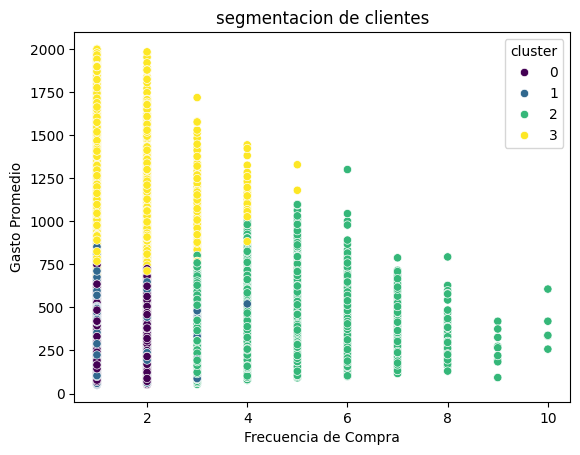

In [25]:
sns.scatterplot(x=clientes["frecuencia"], y=clientes["gasto_promedio"],
               hue=clientes["cluster"], palette="viridis")

plt.xlabel("Frecuencia de Compra")
plt.ylabel("Gasto Promedio")
plt.title("segmentacion de clientes")
plt.show()